In [ ]:
install.packages('XQuartz')
install.packages('hrbrthemes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘XQuartz’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gdtools’


Warning message in install.packages("hrbrthemes"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("hrbrthemes"):
“installation of package ‘hrbrthemes’ had non-zero exit status”


In [ ]:
#Tools for Working with URLs and HTTP
library(httr)

#Focussed on tools for working with data frames
library(dplyr)

#ggplot2 is a system for declaratively creating graphics
library(ggplot2)

#Additional Themes, Theme Components and Utilities for 'ggplot2'
library(hrbrthemes)

#Make Dealing with Dates a Little Easier
library(lubridate)

#Tidy Messy Data
library(tidyr)

ERROR: ignored

In [ ]:
#Ignore SSL errors in R httr connection
#An SSL certificate error occurs when a web browser can't verify the SSL certificate installed on a site
httr::set_config(config(ssl_verifypeer = 0L))

In [ ]:
resp_jabar <- GET("https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json")
cov_jabar_raw <- content(resp_jabar, as = "parsed", simplifyVector = TRUE)

In [ ]:
#Get list column of cov_jabar_raw
names(cov_jabar_raw)

[1] "last_date"            "provinsi"             "kasus_total"         
 [4] "kasus_tanpa_tgl"      "kasus_dengan_tgl"     "meninggal_persen"    
 [7] "meninggal_tanpa_tgl"  "meninggal_dengan_tgl" "sembuh_persen"       
[10] "sembuh_tanpa_tgl"     "sembuh_dengan_tgl"    "list_perkembangan"   
[13] "data"

In [ ]:
print(paste("Kasus total di provinsi Jawa Barat :", cov_jabar_raw$kasus_total))
print(paste0("Presentase kasus meninggal di provinsi Jawa Barat :", round(cov_jabar_raw$meninggal_persen, 2), "%"))
print(paste0("Presentase kasus sembuj di provinsi Jawa Barat :", round(cov_jabar_raw$sembuh_persen), "%"))

[1] "Kasus total di provinsi Jawa Barat : 1105134"
[1] "Presentase kasus meninggal di provinsi Jawa Barat :1.43%"
[1] "Presentase kasus sembuj di provinsi Jawa Barat :98%"


In [ ]:
cov_jabar <- cov_jabar_raw$list_perkembangan
str(cov_jabar)
head(cov_jabar)

'data.frame':	785 obs. of  9 variables:
 $ tanggal                     : num  1.58e+12 1.58e+12 1.58e+12 1.58e+12 1.58e+12 ...
 $ KASUS                       : int  1 1 1 1 0 0 0 0 0 1 ...
 $ MENINGGAL                   : int  1 0 0 0 0 0 0 0 1 0 ...
 $ SEMBUH                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DIRAWAT_OR_ISOLASI          : int  0 1 1 1 0 0 0 0 -1 1 ...
 $ AKUMULASI_KASUS             : int  1 2 3 4 4 4 4 4 4 5 ...
 $ AKUMULASI_SEMBUH            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AKUMULASI_MENINGGAL         : int  1 1 1 1 1 1 1 1 2 2 ...
 $ AKUMULASI_DIRAWAT_OR_ISOLASI: int  0 1 2 3 3 3 3 3 2 3 ...


,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1.583194e+12,1,1,0,0,1,0,1,0
2,1.583280e+12,1,0,0,1,2,0,1,1
3,1.583366e+12,1,0,0,1,3,0,1,2
4,1.583453e+12,1,0,0,1,4,0,1,3
5,1.583539e+12,0,0,0,0,4,0,1,3
6,1.583626e+12,0,0,0,0,4,0,1,3


In [ ]:
new_cov_jabar <-
#Data cov_jabar akan diolah diproses lebih lanjut
    cov_jabar %>%
    #ke langkah selanjutnya
    select(-contains("DIRAWAT_OR_ISOLASI")) %>%
    #memilih kolom yang tidak mengandung kata-kata "DIRAWAT_OR_ISOLASI"
    select(-starts_with("AKUMULASI")) %>%
    #memilih kolom yang tidak diawali dengan kata-kata "AKUMULASI"
    rename(
    #mengubah nama
        kasus_baru = KASUS,
        #mengubah nama kolom kasus_baru menjadi KASUS (dibaca dari kanan ke kiri)
        meninggal = MENINGGAL,
        #mengubah nama kolom meninggal menjadi MENINGGAL
        sembuh = SEMBUH
        #mengubah nama kolom sembuh menjadi SEMBUH
    ) %>%
    #update bentuk value dari kolom tanggal supaya lebih mudah dipahami (mengubah data numerik menjadi teks)
    mutate(
      #mengupdate atau menambah kolom
      tanggal = as.POSIXct(tanggal / 1000, origin = "1970-01-01"),
      #di kolom 'tanggal' mau atau diupdate karena di data mentah sudah ada tulisnnya. Kalo ga ada baru fungsinya untuk menambah kolom baru
      tanggal = as.Date(tanggal)
    )
    #kalau sudah selesai, baru disimpan di data baru dengan nama new_cov_jabar

In [ ]:
#Tampilkan hasil transformasi
head(new_cov_jabar)

,tanggal,kasus_baru,meninggal,sembuh
,<date>,<int>,<int>,<int>
1,2020-03-03,1,1,0
2,2020-03-04,1,0,0
3,2020-03-05,1,0,0
4,2020-03-06,1,0,0
5,2020-03-07,0,0,0
6,2020-03-08,0,0,0


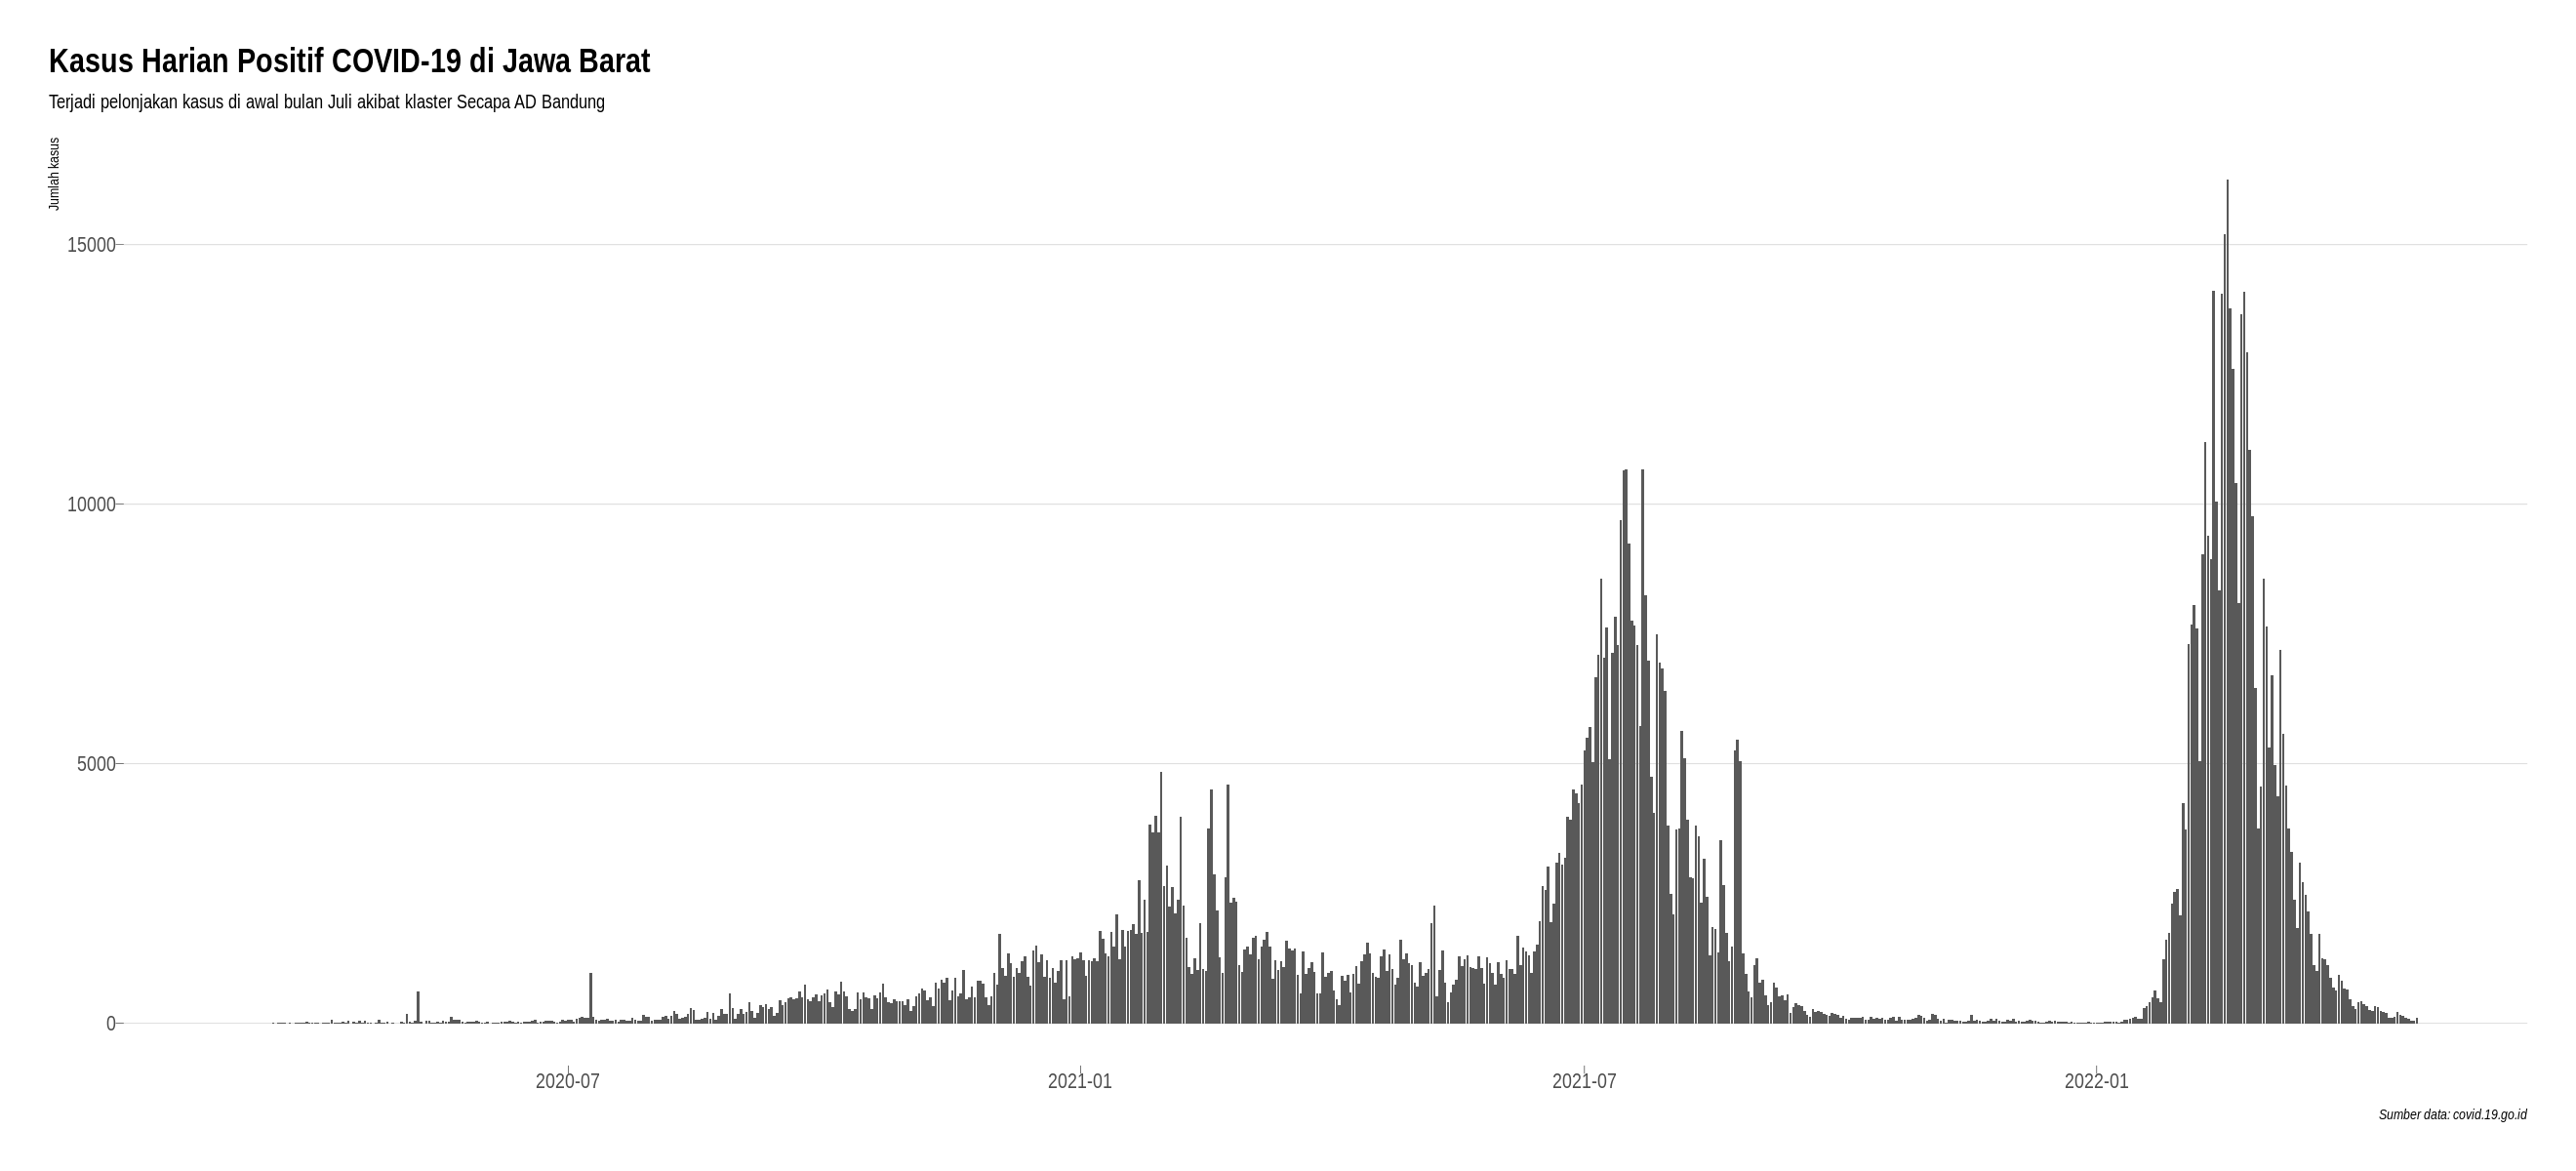

In [ ]:
#Untuk mengatur tinggi dan lebar dari canvas / figure
options(repr.plot.width = 22, repr.plot.height = 10)

covid.bar <- ggplot(
#Library untuk membuat plot
                    new_cov_jabar,
                    #Data yang akan diplot
                    aes(
                    #Untuk nilai / inisiasi nilai sumbu
                        x = tanggal,
                        y = kasus_baru
                    )
             ) +
             geom_col() +
             #Bar Chart
             labs(
             #memberi label / penamaan di masing-masing sumbu
	              x = NULL,
                #NULL adalah ketidakadanya data (data_kosong)
	              y = "Jumlah kasus",
	              title = "Kasus Harian Positif COVID-19 di Jawa Barat",
	              subtitle = "Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung",
	              caption = "Sumber data: covid.19.go.id"
	          ) +
            #
            theme_ipsum(
                base_size = 13,
                plot_title_size = 21,
                grid = "Y",
                ticks = TRUE
                #nilai dari sumbu sumbu y
           ) +
           theme(plot.title.position = "plot")

covid.bar

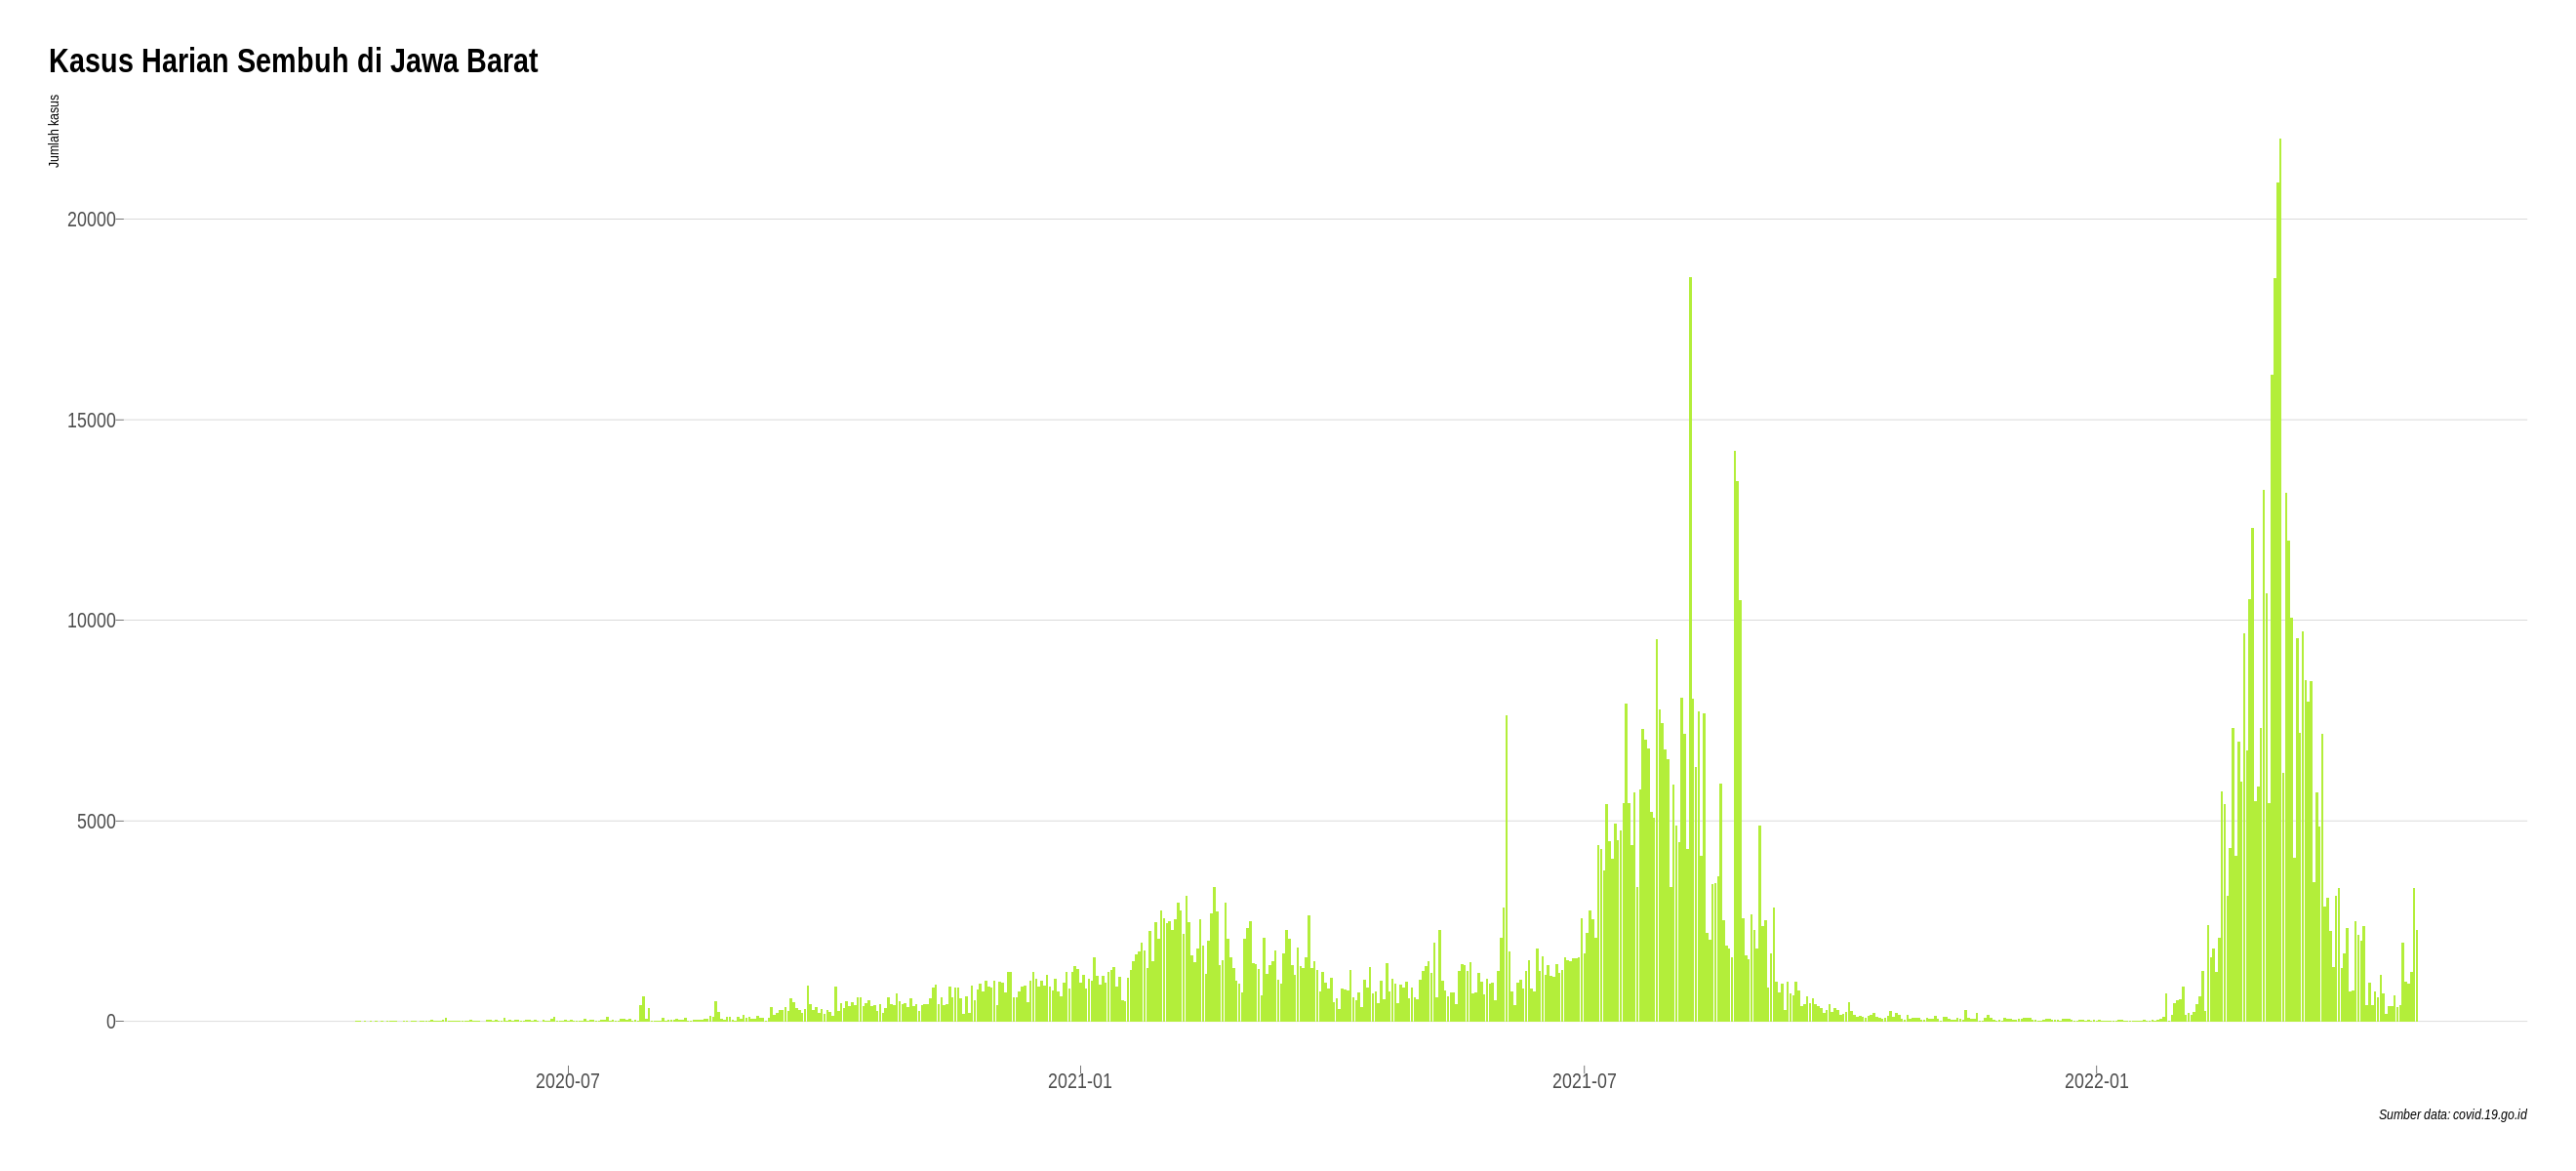

In [ ]:
options(repr.plot.width = 22, repr.plot.height = 10)

covid.bar.sembuh <- ggplot(
                        new_cov_jabar,
                        aes(
                            x = tanggal,
                            y = sembuh
                        )
                    ) +
                    geom_col(fill = "olivedrab2") +
                    labs(
	                      x = NULL,
	                      y = "Jumlah kasus",
	                      title = "Kasus Harian Sembuh di Jawa Barat",
	                      caption = "Sumber data: covid.19.go.id"
	                  ) +
                    theme_ipsum(
                        base_size = 13,
                        plot_title_size = 21,
                        grid = "Y",
                        ticks = TRUE
                   ) +
                   theme(plot.title.position = "plot")

covid.bar.sembuh

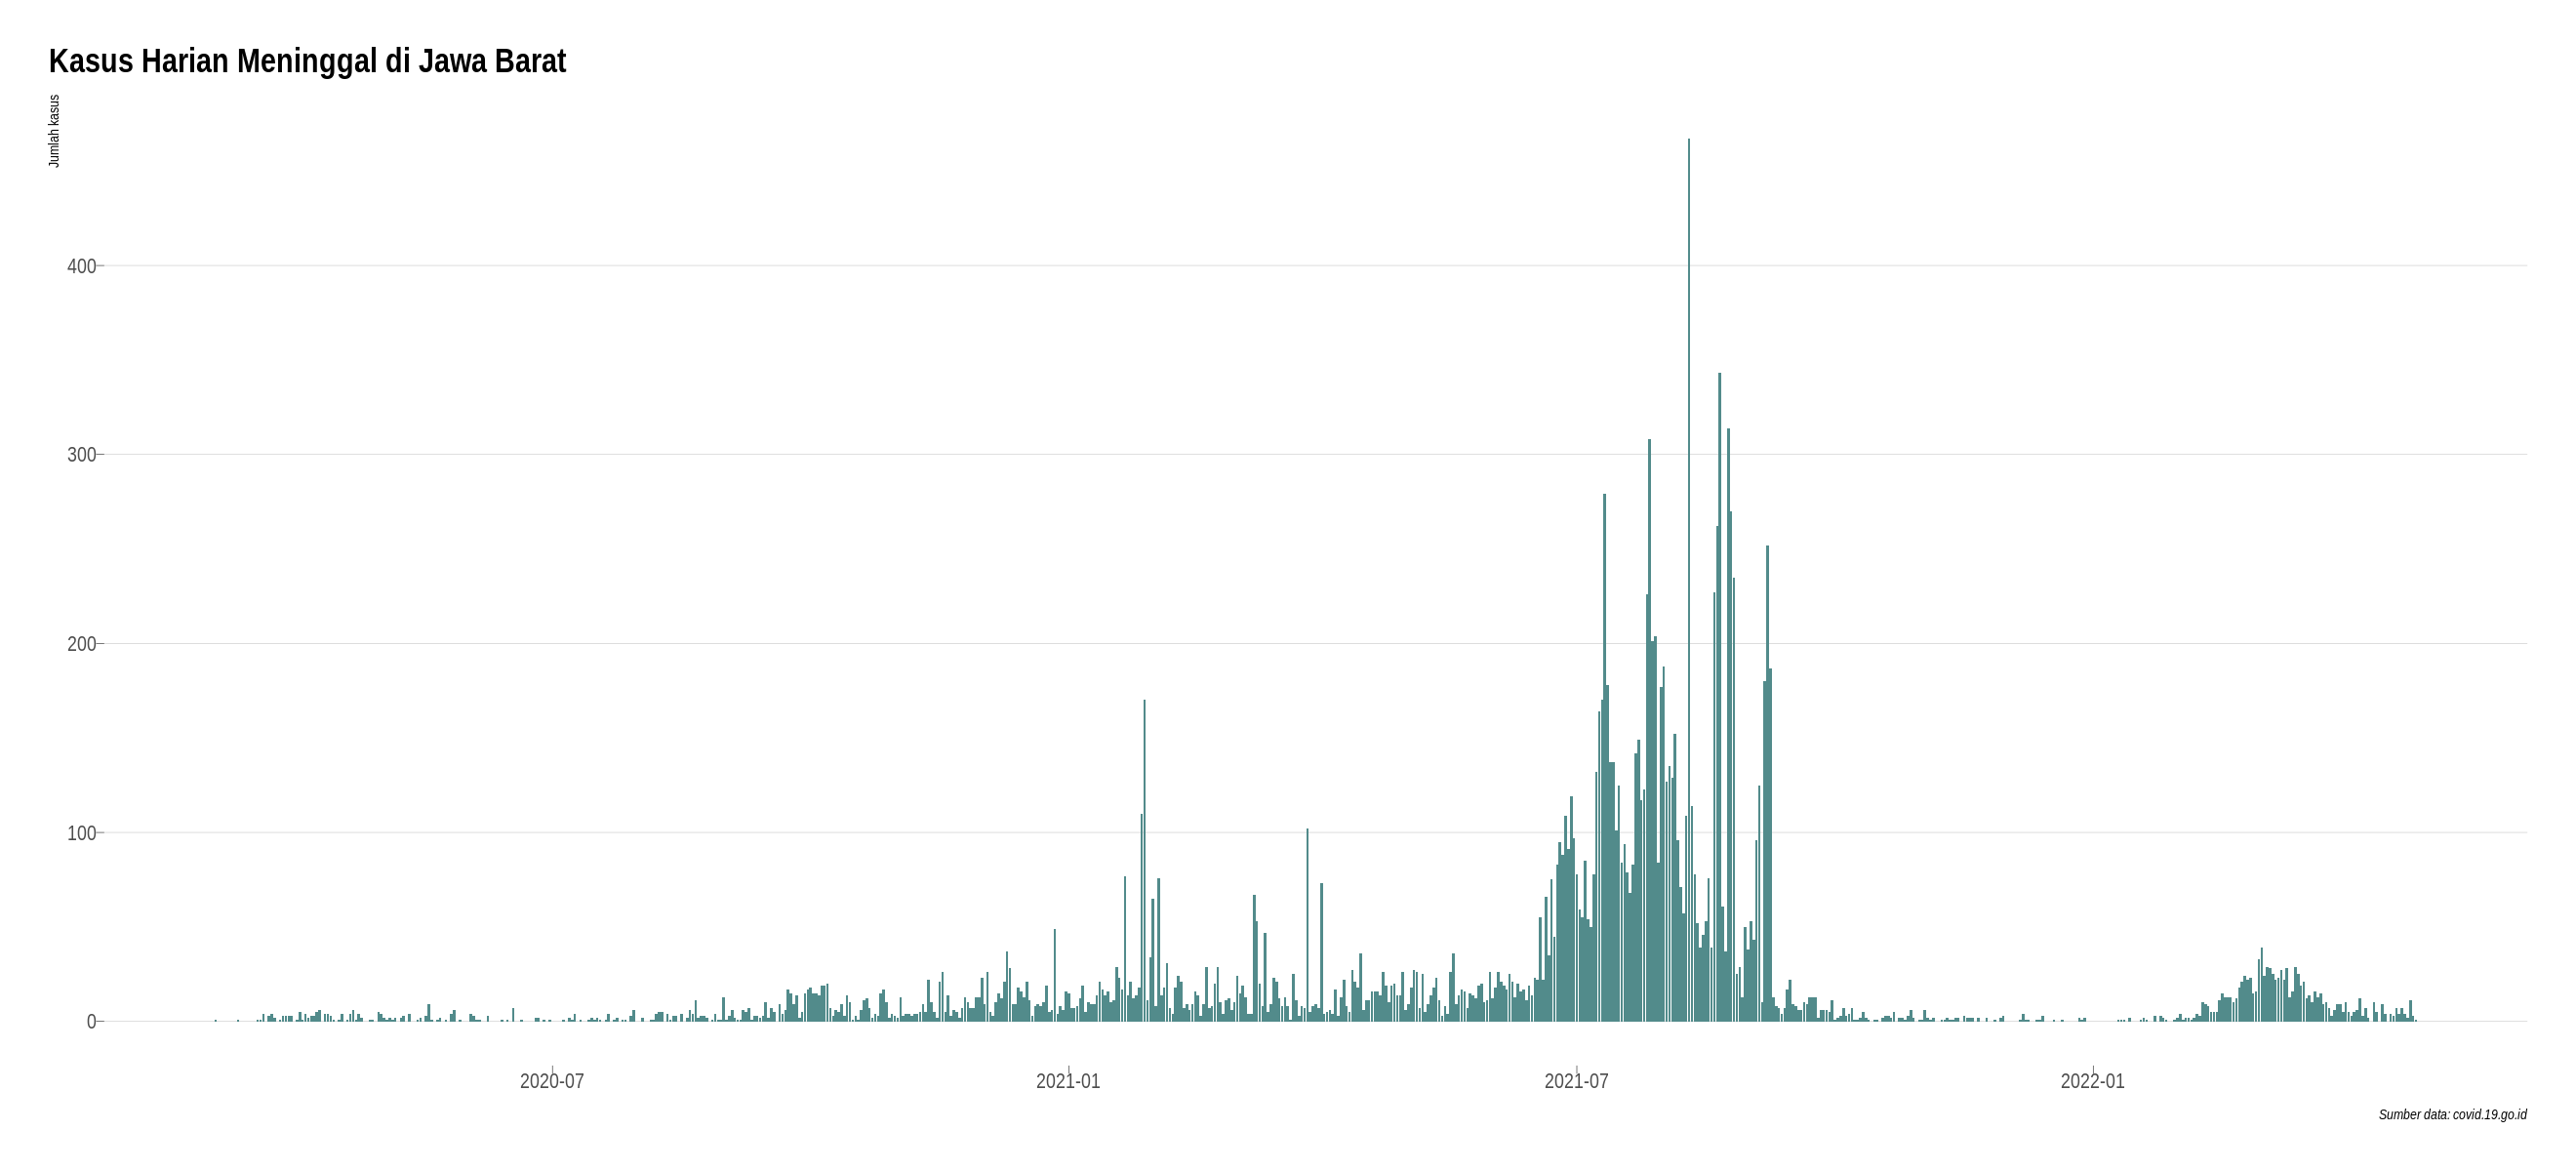

In [ ]:
options(repr.plot.width = 22, repr.plot.height = 10)

covid.bar.mati <-   ggplot(
                        new_cov_jabar,
                        aes(
                            x = tanggal,
                            y = meninggal
                        )
                    ) +
                    geom_col(fill = "darkslategray4") +
                    labs(
	                      x = NULL,
	                      y = "Jumlah kasus",
	                      title = "Kasus Harian Meninggal di Jawa Barat",
	                      caption = "Sumber data: covid.19.go.id"
	                  ) +
                    theme_ipsum(
                        base_size = 13,
                        plot_title_size = 21,
                        grid = "Y",
                        ticks = TRUE
                   ) +
                   theme(plot.title.position = "plot")

covid.bar.mati


In [ ]:
options(repr.plot.width = 22, repr.plot.height = 10)

In [ ]:
#Diambil dari new_cov_jabar
cov_jabar_pekanan <- new_cov_jabar %>%
  count(
    tahun = year(tanggal),
    pekan_ke = week(tanggal),
    wt = kasus_baru,
    #mengambil dari kasus baru
    name = "jumlah"
  )

glimpse(cov_jabar_pekanan)

Rows: 115
Columns: 3
$ tahun    <dbl> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2…
$ pekan_ke <dbl> 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24…
$ jumlah   <int> 1, 3, 16, 41, 98, 149, 153, 155, 156, 284, 803, 175, 395, 203…


In [ ]:
cov_jabar_pekanan <- cov_jabar_pekanan %>%
                        mutate(
                            jumlah_pekanlalu = dplyr::lag(jumlah, 1),
                            jumlah_pekanlalu = ifelse(is.na(jumlah_pekanlalu), 0, jumlah_pekanlalu),
                            lebih_baik = jumlah < jumlah_pekanlalu
                        )

glimpse(cov_jabar_pekanan)

ERROR: ignored

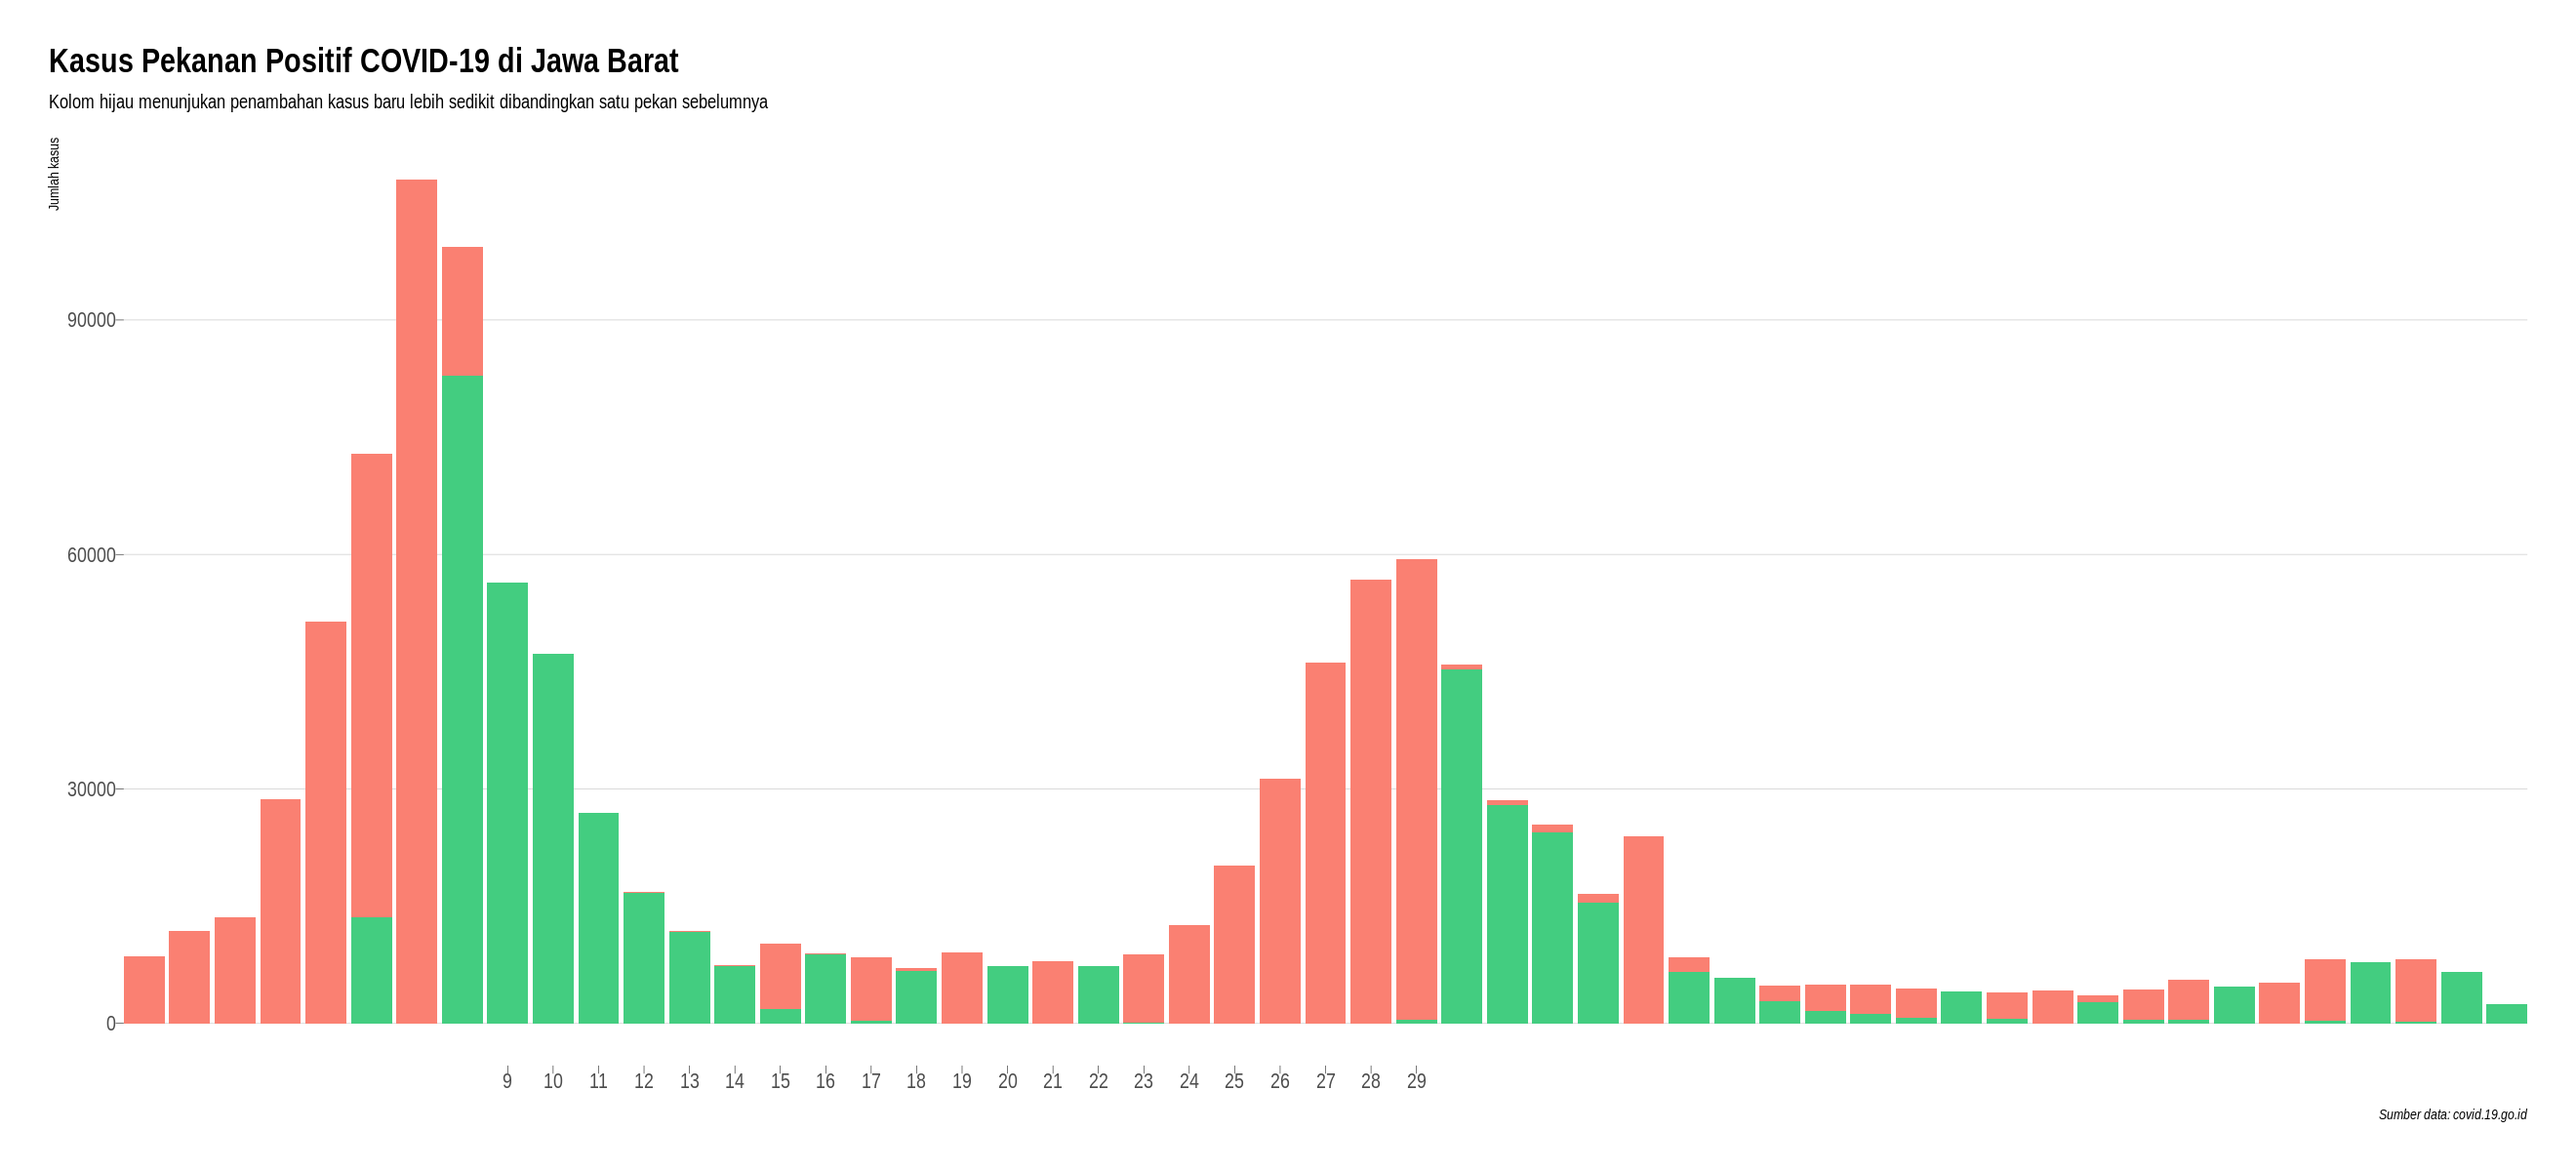

In [ ]:
ggplot(cov_jabar_pekanan, aes(pekan_ke, jumlah, fill = lebih_baik)) +
  geom_col(show.legend = FALSE) +
  scale_x_continuous(breaks = 9:29, expand = c(0, 0)) +
  scale_fill_manual(values = c("TRUE" = "seagreen3", "FALSE" = "salmon")) +
  labs(
  	x = NULL,
  	y = "Jumlah kasus",
  	title = "Kasus Pekanan Positif COVID-19 di Jawa Barat",
  	subtitle = "Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya",
  	caption = "Sumber data: covid.19.go.id"
  ) +
  theme_ipsum(
  	base_size = 13,
  	plot_title_size = 21,
  	grid = "Y",
  	ticks = TRUE
  ) +
  theme(plot.title.position = "plot")

In [ ]:
cov_jabar_akumulasi <-
  new_cov_jabar %>%
  transmute(
    tanggal,
    akumulasi_aktif = cumsum(kasus_baru) - cumsum(sembuh) - cumsum(meninggal),
    akumulasi_sembuh = cumsum(sembuh),
    akumulasi_meninggal = cumsum(meninggal)
  )
tail(cov_jabar_akumulasi)

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
,<date>,<int>,<int>,<int>
780,2022-04-21,11628,1077361,15731
781,2022-04-22,10753,1078344,15735
782,2022-04-23,9882,1079297,15737
783,2022-04-24,8709,1080519,15748
784,2022-04-25,5428,1083851,15751
785,2022-04-26,3253,1086129,15752


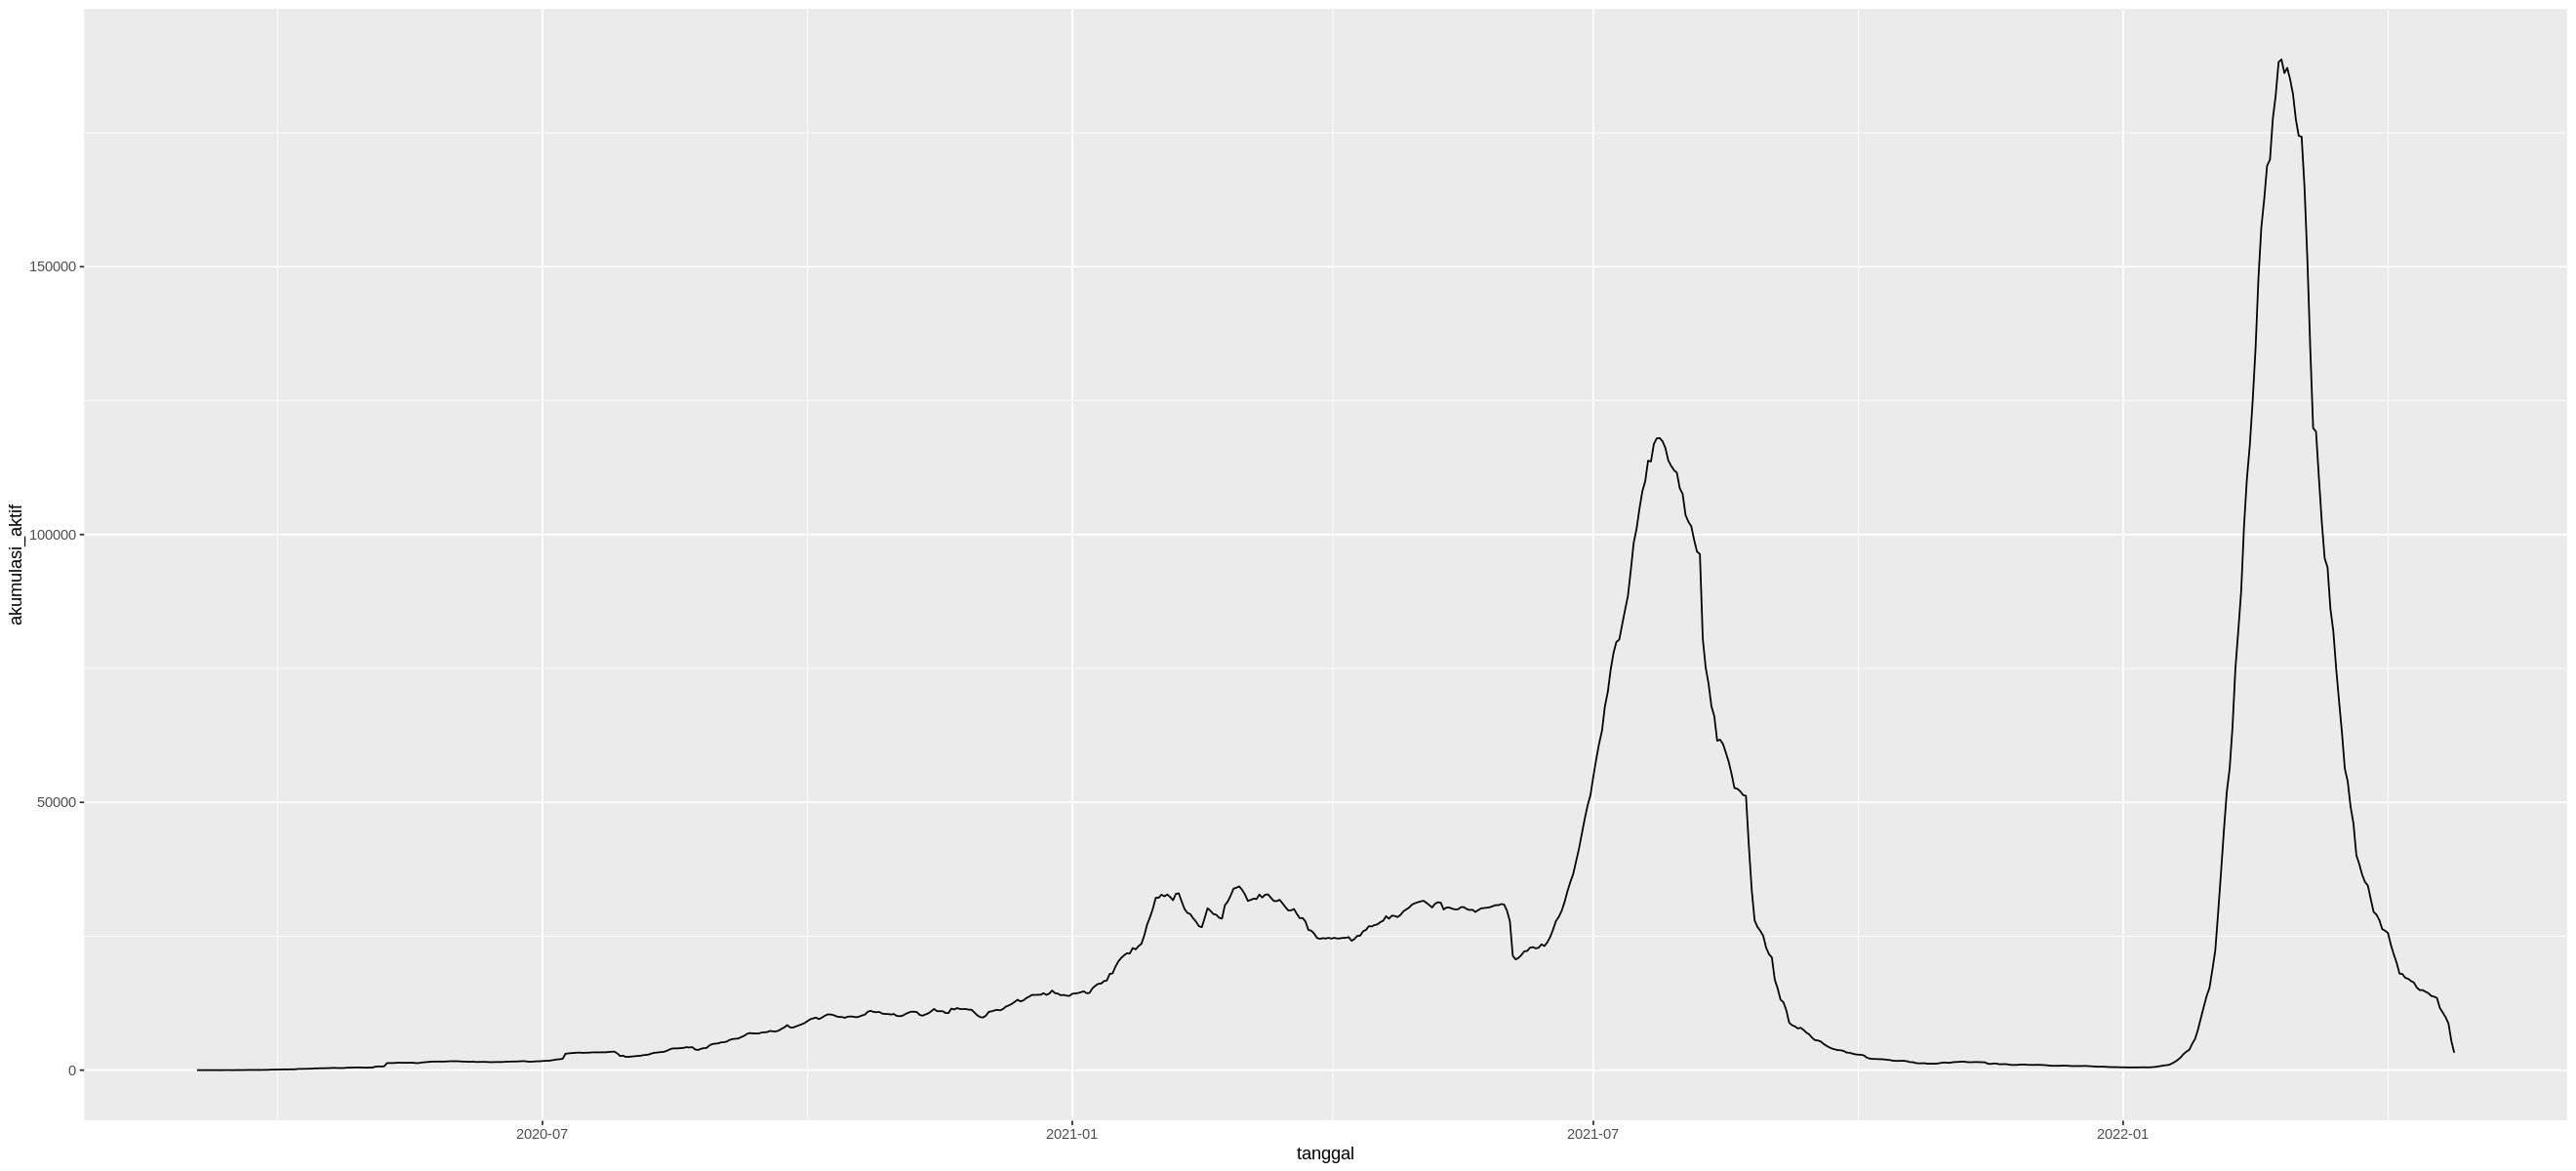

In [ ]:
ggplot(data = cov_jabar_akumulasi, aes(x = tanggal, y = akumulasi_aktif)) +
  geom_line()

In [ ]:
dim(cov_jabar_akumulasi)

[1] 785   4

In [ ]:
cov_jabar_akumulasi_pivot <-
  cov_jabar_akumulasi %>%
  gather(
    key = "kategori",
    value = "jumlah",
    -tanggal
  ) %>%
  mutate(
    kategori = sub(pattern = "akumulasi_", replacement = "", kategori)
  )

In [ ]:
cov_jabar_akumulasi_pivot

tanggal,kategori,jumlah
<date>,<chr>,<int>
2020-03-03,aktif,0
2020-03-04,aktif,1
2020-03-05,aktif,2
2020-03-06,aktif,3
2020-03-07,aktif,3
2020-03-08,aktif,3
2020-03-09,aktif,3
2020-03-10,aktif,3
2020-03-11,aktif,2


In [ ]:
dim(cov_jabar_akumulasi_pivot)

[1] 2355    3

In [ ]:
glimpse(cov_jabar_akumulasi_pivot)

Rows: 2,355
Columns: 3
$ tanggal  <date> 2020-03-03, 2020-03-04, 2020-03-05, 2020-03-06, 2020-03-07, …
$ kategori <chr> "aktif", "aktif", "aktif", "aktif", "aktif", "aktif", "aktif"…
$ jumlah   <int> 0, 1, 2, 3, 3, 3, 3, 3, 2, 3, 6, 6, 4, 2, 13, 14, 17, 29, 34,…


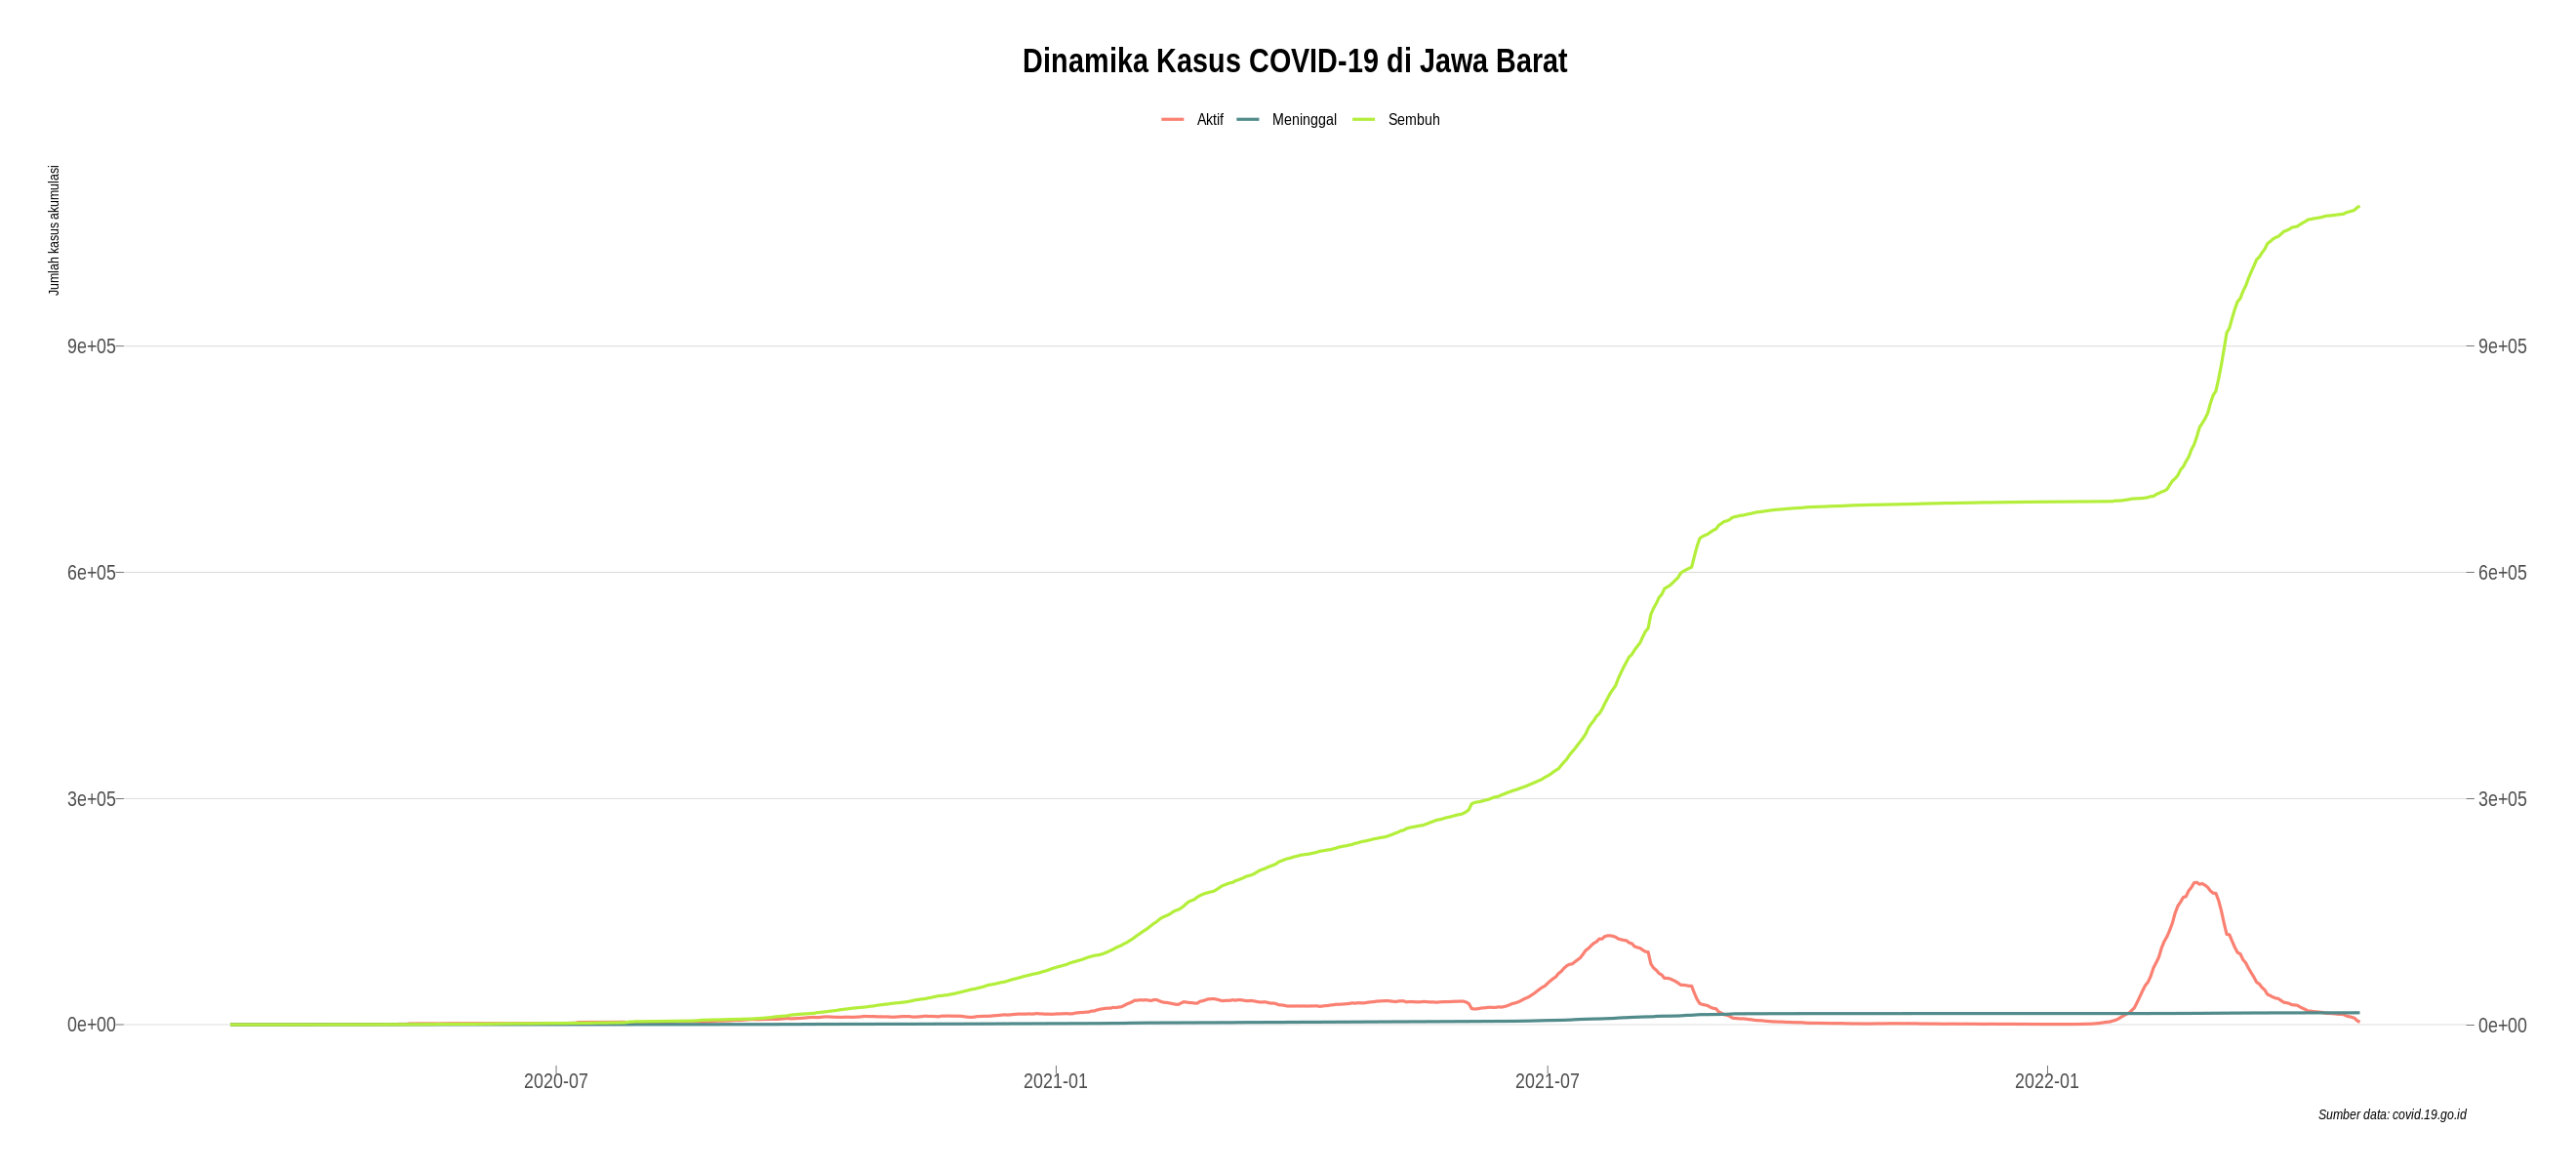

In [ ]:
ggplot(cov_jabar_akumulasi_pivot, aes(tanggal, jumlah, colour = (kategori))) +
  geom_line(size = 0.9) +
  scale_y_continuous(sec.axis = dup_axis(name = NULL)) +
  scale_colour_manual(
	values = c(
	  "aktif" = "salmon",
	  "meninggal" = "darkslategray4",
	  "sembuh" = "olivedrab2"
	),
	  labels = c("Aktif", "Meninggal", "Sembuh")
  ) +
    labs(
  	x = NULL,
  	y = "Jumlah kasus akumulasi",
  	colour = NULL,
  	title = "Dinamika Kasus COVID-19 di Jawa Barat",
  	caption = "Sumber data: covid.19.go.id"
  ) +
    theme_ipsum(
  	base_size = 13,
  	plot_title_size = 21,
  	grid = "Y",
  	ticks = TRUE
  ) +
  theme(
  	plot.title = element_text(hjust = 0.5),
  	legend.position = "top"
  )